In [135]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pylab import mpl

plt.style.use("seaborn-pastel")

# 字体设置
mpl.rcParams['font.family'] = ['Microsoft Yahei']  # 使用字体中的无衬线体
mpl.rcParams['font.size'] = 13  # 设置字体大小
mpl.rcParams['axes.unicode_minus'] = False  # 使坐标轴刻度标签正常显示正负号

C:\Users\lenovo\AppData\Local\Temp\ipykernel_34312\2664286757.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


In [73]:
REGION_MAP = {
    '华北地区': ['北京西山国家森林公园', '北京上方山国家森林公园', '塞罕坝国家森林公园',
                 '乌金山国家森林公园', '阿尔山国家森林公园'],
    '东北地区': ['关门山国家森林公园', '猴石国家森林公园', '净月潭', '五营国家森林公园'],
    '华东地区': ['西佘山园', '三台山国家森林公园', '大奇山国家森林公园', '福州国家森林公园',
                 '日照海滨国家森林公园'],
    '华中地区': ['张家界国家森林公园', '莽山国家森林公园', '九龙江国家森林公园'],
    '华南地区': ['南岭国家森林公园', '流溪河国家森林公园', '石门国家森林公园', '姑婆山',
                 '尖峰岭国家森林公园'],
    '西南地区': ['仙女山国家森林公园', '武陵山国家森林公园', '海螺沟',
                 '西双版纳原始森林公园'],
    '西北地区': ['太白山国家森林公园', '黎坪森林公园', '坎布拉国家森林公园', '天门山国家森林公园']
}

# 1 导入数据

In [36]:
workbook = openpyxl.load_workbook('all_打标注.xlsx')

E:\PythonEnvironment\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [37]:
worksheet = workbook.active

In [38]:
biaozhu = []

In [39]:
for row in tqdm(range(1, worksheet.max_row + 1)):
    biaozhu.append([worksheet[f'A{row}'].value,
                    worksheet[f'B{row}'].value,
                    worksheet[f'C{row}'].value,
                    worksheet[f'D{row}'].value])

100%|██████████| 22579/22579 [00:00<00:00, 70165.90it/s]


In [40]:
biaozhu_df = pd.DataFrame(columns=biaozhu[0], data=biaozhu[1:])

In [41]:
biaozhu_df.groupby('type').count()

,None,k,v
type,,,
基础设施,81,81,81
景区价格,15,15,15
景区服务（和人有关的）,19,19,19
景区环境（自然）,126,126,126


## 准备标注的隐射

In [52]:
biaozhu_df.dropna(inplace=True)

In [69]:
xx_map = {
    '基础设施': 'A',
    '景区服务（和人有关的）': 'B',
    '景区价格': 'C',
    '景区环境（自然）': 'D'
}
biaozhu_map = {}
for i in biaozhu_df.groupby('type').count().index:
    biaozhu_map[xx_map[i]] = []

In [71]:
for row in tqdm(biaozhu_df.index):
    biaozhu_map[xx_map[biaozhu_df.loc[row, 'type']]].append(biaozhu_df.loc[row, 'k'])

100%|██████████| 241/241 [00:00<00:00, 40081.97it/s]


In [62]:
biaozhu_map = {}
for i in biaozhu_df.groupby('type').count().index:
    biaozhu_map[i] = []

In [48]:
df = pd.read_excel('备份2.0.xlsx', index_col=0)

In [49]:
df

,name,id,level,num,all_point,user,point,content,lan,date,ip,key,region
0,西佘山园,76825,NaN,107,4.7,走走停停。。,5,周末带娃随便爬一下还是不错的，增进感情,zh-cn,2023-05-31,上海,"[{'count': 1, 'eq': '0.953', 'final': '0.671',...",华东地区
1,西佘山园,76825,NaN,107,4.7,139****8030,2,2月初的时候带爸妈去逛了一圈，山倒不高，不过对平时缺乏运动的或者腿脚不便的上了年纪的人来说还...,zh-cn,2023-03-22,上海,"[{'score': '0.575', 'word': '钢钉'}, {'score': '...",华东地区
2,西佘山园,76825,NaN,107,4.7,M36****7643,5,上海松江佘山，人少景美，空气好。,zh-cn,2023-03-22,上海,"[{'score': '0.686', 'word': '佘山'}, {'score': '...",华东地区
3,西佘山园,76825,NaN,107,4.7,ell****ng,5,在上海算是非常值得一游的地方了,zh-cn,2023-01-31,上海,"[{'score': '0.624', 'word': '地方'}, {'score': '...",华东地区
4,西佘山园,76825,NaN,107,4.7,EricmengTW,4,Very good Very nice,zh-cn,2022-12-26,湖北,None,华东地区
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40964,海螺沟,89792,5.0,3614,4.3,ysypyq521,5,非常好！景区环境卫生都很好！合适家人一起游玩！,zh-cn,2019-04-06,NaN,"[{'score': '0.652', 'word': '景区'}, {'score': '...",西南地区
40965,海螺沟,89792,5.0,3614,4.3,M59****86,5,三月份游海螺沟门票及交通车缆车全部享受半价，四号营地冰川有太阳的照下，光芒四射，有远近雪山的...,zh-cn,2019-04-06,NaN,"[{'score': '0.641', 'word': '螺沟'}, {'score': '...",西南地区
40966,海螺沟,89792,5.0,3614,4.3,丑丑诺诺,5,非常值得一来看，冰川时代，雪景美,zh-cn,2019-04-06,NaN,"[{'score': '0.749', 'word': '雪景'}, {'score': '...",西南地区
40967,海螺沟,89792,5.0,3614,4.3,my_way66,5,景区管理不错，基础设施完善，沿着冰川和雪山，走在森林中,zh-cn,2019-04-06,NaN,"[{'score': '0.663', 'word': '雪山'}, {'score': '...",西南地区


# 2 计算 ipa
## 2.1 编码

In [75]:
bianma = {}


In [80]:
for region, one_df in df.groupby('region'):
    tem = []
    for row in one_df.index:
        one_key = one_df.loc[row, 'key']
        try:
            for i in eval(one_key):
                tem_score = None
                if 'final' in i:
                    tem_score = eval(i['final'])
                else:
                    tem_score = eval(i['score'])

                if tem_score:
                    key = i['word']
                    for k, v in biaozhu_map.items():
                        if key in v:
                            tem.append([k, tem_score, one_df.loc[row, 'point']])

        except Exception as e:
            # print(f'{one_key} | {e}')
            print(e)
    bianma[region] = tem

'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
eval() arg 1 must be a string, bytes or code object
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
eval() arg 1 must be a string, bytes or code object
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' o

In [81]:
bianma

{'东北地区': [['D', 0.579, 5],
  ['D', 0.651, 4],
  ['D', 0.513, 4],
  ['D', 0.701, 3],
  ['D', 0.607, 5],
  ['D', 0.604, 5],
  ['D', 0.692, 5],
  ['D', 0.678, 5],
  ['D', 0.637, 5],
  ['D', 0.622, 5],
  ['A', 0.566, 5],
  ['C', 0.556, 5],
  ['C', 0.586, 4],
  ['D', 0.576, 4],
  ['D', 0.553, 4],
  ['D', 0.813, 5],
  ['D', 0.672, 4],
  ['D', 0.629, 4],
  ['D', 0.615, 4],
  ['D', 0.663, 4],
  ['D', 0.648, 5],
  ['D', 0.514, 5],
  ['D', 0.638, 5],
  ['D', 0.623, 4],
  ['D', 0.597, 4],
  ['D', 0.601, 4],
  ['D', 0.841, 5],
  ['D', 0.841, 5],
  ['D', 0.698, 4],
  ['D', 0.635, 4],
  ['D', 0.701, 5],
  ['D', 0.655, 5],
  ['D', 0.716, 3],
  ['D', 0.701, 3],
  ['C', 0.579, 4],
  ['D', 0.57, 4],
  ['D', 0.549, 4],
  ['D', 0.543, 4],
  ['D', 0.659, 4],
  ['D', 0.689, 5],
  ['D', 0.652, 5],
  ['D', 0.596, 5],
  ['D', 0.513, 5],
  ['D', 0.674, 4],
  ['D', 0.629, 4],
  ['D', 0.609, 4],
  ['D', 0.602, 4],
  ['D', 0.687, 5],
  ['D', 0.635, 5],
  ['D', 0.516, 5],
  ['A', 0.703, 5],
  ['D', 0.65, 5],
  ['D'

## 2.2 计算具体的值

In [101]:
ipa_res = pd.DataFrame(index=['A', 'B', 'C', 'D'], columns=REGION_MAP.keys())
ipa_res

,华北地区,东北地区,华东地区,华中地区,华南地区,西南地区,西北地区
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
for region, one_df in bianma.items():
    one_df = pd.DataFrame(one_df, columns=['要素', '权重', '得分'])
    tem = []
    for k, v in one_df.groupby('要素'):
        i = v.sum()['权重'] / one_df.sum()['权重']
        p = v.sum()['得分'] / v.count()['得分']

        ipa_res.loc[k, region] = (i, p)


In [185]:
ipa_res

,华北地区,东北地区,华东地区,华中地区,华南地区,西南地区,西北地区
A,"(0.2646735122968967, 4.132628152969894)","(0.1962823315867178, 4.413032827045566)","(0.16284980150126524, 4.222993492407809)","(0.24822522629943422, 4.291139240506329)","(0.19048919433872616, 4.443204868154158)","(0.20024038003134628, 4.109896971589135)","(0.30434871881196923, 4.516937669376694)"
B,"(0.07258810987137725, 3.9093610698365526)","(0.07209178638200751, 4.330226364846871)","(0.04134465504736114, 4.062711864406779)","(0.09533923797381508, 4.031034482758621)","(0.05941697902218725, 4.465378421900161)","(0.08414795741397676, 4.112927191679049)","(0.09480920393290668, 4.1400437636761485)"
C,"(0.11141384448330402, 3.981132075471698)","(0.06771807758210542, 4.21976401179941)","(0.08538157955851274, 3.961016949152542)","(0.07700631522566657, 4.0021786492374725)","(0.06440810828538017, 4.091883614088821)","(0.08367039279767, 3.8790697674418606)","(0.06377092593541608, 4.1792763157894735)"
D,"(0.5513245333484222, 4.550029838870102)","(0.6639078044491692, 4.656623836951706)","(0.710423963892861, 4.48955798864558)","(0.5794292205010841, 4.66415967601967)","(0.6856857183537066, 4.602660251874911)","(0.6319412697570069, 4.42125025370408)","(0.5370711513197081, 4.672908133411352)"


In [173]:
# 计算中心点
x = 0
y = 0
for region in REGION_MAP.keys():
    for i in ipa_res[region]:
        x += i[0]
        y += i[1]

x = x / 28
y = y / 28

7it [00:01,  4.14it/s]


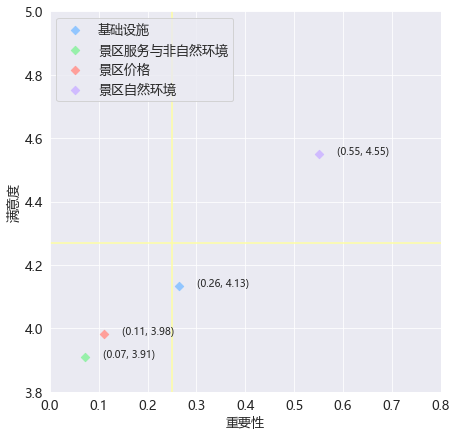

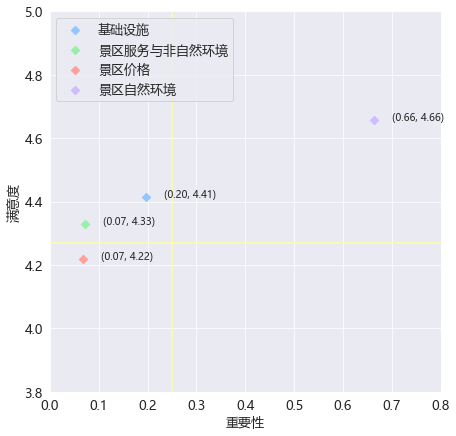

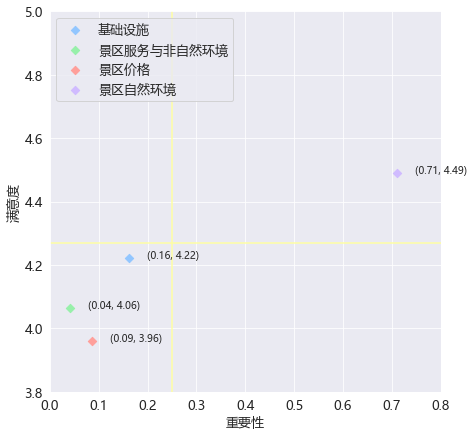

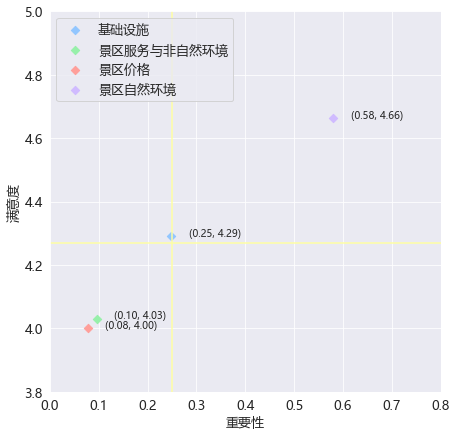

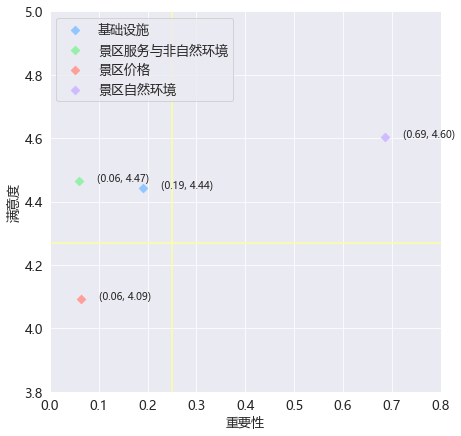

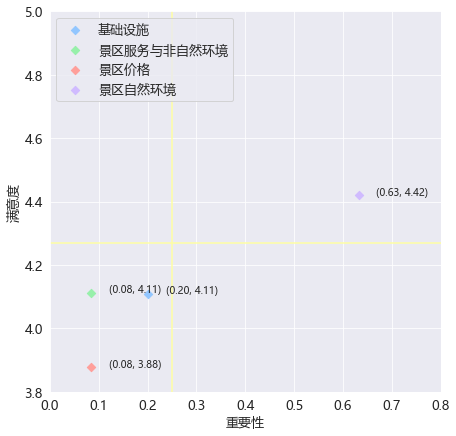

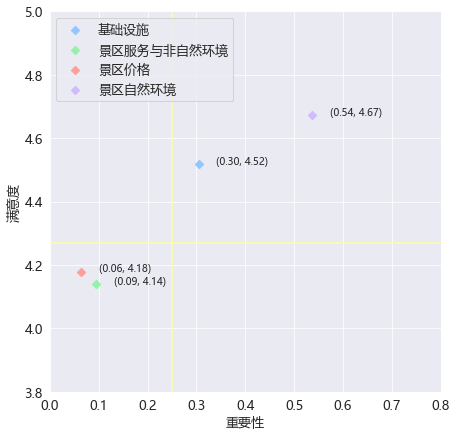

In [190]:
for region, marker in tqdm(zip(REGION_MAP.keys(), 'osDx+^v')):
    plt.figure(figsize=(7, 7))
    plt.plot([x, x], [3.8, 5], color='#fffea3')  # 垂直
    plt.plot([0, 0.8], [y, y], color='#fffea3')  # 水平
    for i, label in zip(ipa_res[region], ['基础设施', '景区服务与非自然环境', '景区价格', '景区自然环境']):
        plt.scatter(i[0], i[1],
                    marker='D',
                    label=label, s=35)
        plt.text(i[0] + 0.09, i[1], '(%.2f, %.2f)' % i, ha='center', size=10)


    plt.xlim(0, 0.8)
    plt.ylim(3.8, 5)
    plt.xlabel('重要性')
    plt.ylabel('满意度')
    plt.legend(loc='upper left')
    plt.savefig(f'./pic/ipa_{region}.svg')